In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.dqn import DQN
from networks.nn_dueling import DuelingNet

import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

target_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

policy_net = DuelingNet(
    input_dim=batch_dur*3+3,
    output_dim=3,
)

dqn = DQN(
    env=env,
    env_type='vector',
    n_actions=3,
    log_freq=1,
    train_freq=3,
    batch_size=100,
    w_sync_freq=10,
    memory_size=1000,
    epsilon_start=1,
    epsilon_decay=0.995,
    gamma=0.9,
    step_size=0.01,
    episodes=1000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.001),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_nn',
)

In [2]:
dqn.run(1000)

collecting experience...

Ep: 0 | TS: 19970 | L: 20926845.422 | R: 77.79 | P: 22.83 | R.Avg P: 22.83 | NW: 122.83 | R.Avg NW: 122.83 | R.U: 225
Ep: 1 | TS: 39940 | L: 15664211.507 | R: 67.62 | P: 6.03 | R.Avg P: 14.43 | NW: 106.03 | R.Avg NW: 114.43 | R.U: 210
Ep: 2 | TS: 59910 | L: 14378600.252 | R: 65.38 | P: 1.89 | R.Avg P: 10.25 | NW: 101.89 | R.Avg NW: 110.25 | R.U: 203
Ep: 3 | TS: 79880 | L: 14865406.961 | R: 67.82 | P: 5.34 | R.Avg P: 9.02 | NW: 105.34 | R.Avg NW: 109.02 | R.U: 200
Ep: 4 | TS: 99850 | L: 13472469.68 | R: 63.65 | P: -0.94 | R.Avg P: 7.03 | NW: 99.06 | R.Avg NW: 107.03 | R.U: 197
Ep: 5 | TS: 119820 | L: 13353044.782 | R: 63.95 | P: -1.34 | R.Avg P: 5.64 | NW: 98.66 | R.Avg NW: 105.64 | R.U: 195
Ep: 6 | TS: 139790 | L: 10860205.198 | R: 56.33 | P: -12.16 | R.Avg P: 3.09 | NW: 87.84 | R.Avg NW: 103.09 | R.U: 191
Ep: 7 | TS: 159760 | L: 14724214.899 | R: 68.54 | P: 6.56 | R.Avg P: 3.53 | NW: 106.56 | R.Avg NW: 103.53 | R.U: 192
Ep: 8 | TS: 179730 | L: 22419920.434 | 

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


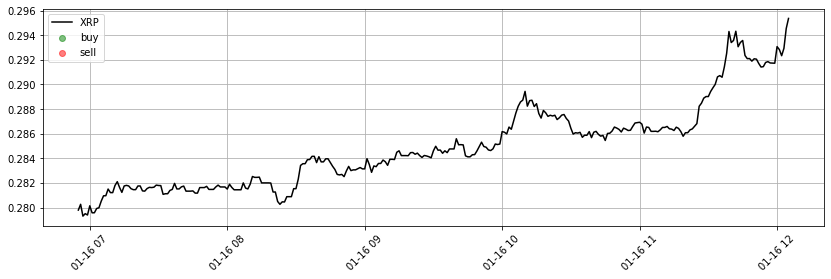

Max.Rewards: 100.0 | Avg.Profit: 0.0 | Avg.Units: 0 | Avg.Bal: 100.0


In [3]:
dqn.evaluate(start_dt='2021-01-16 07:00', duration=300)

## Visualizations

### Training

Text(0.5, 1.0, 'Rolling avg balance per episode')

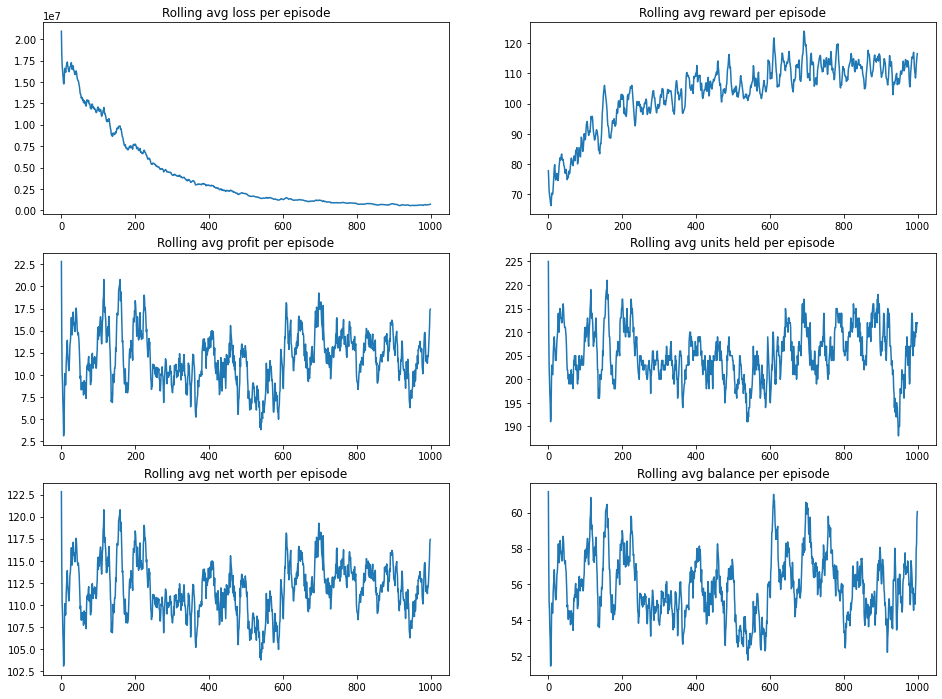

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in dqn.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [5]:
# import pickle
# temp = dict(dqn.logs)
# with open("../pickles/dqn_d_logs.pickle","wb") as f:
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)

In [6]:
# torch.save(dqn.target_net.state_dict(), '../models/dqn_d/target_net')
# torch.save(dqn.policy_net.state_dict(), '../models/dqn_d/policy_net')